# HW_3

In [ ]:
# Yuchen Feng
# UID:106078817

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# 0.) Clean the Apple Data to get a quarterly series of EPS.

In [2]:
y = pd.read_csv("AAPL_quarterly_financials.csv")

In [3]:
y.index = y.name

In [4]:
y = pd.DataFrame(y.loc["BasicEPS", :]).iloc[2:, :]

In [5]:
y.index = pd.to_datetime(y.index)

In [6]:
#Assumption nulls are 0s. need to investigate
y.fillna(0.).sort_index()

,BasicEPS
1985-09-30,0.0
1985-12-31,0.004
1986-03-31,0.002
1986-06-30,0.002
1986-09-30,0.0
...,...
2022-09-30,1.29
2022-12-31,1.89
2023-03-31,1.53
2023-06-30,1.27


# 1.) Come up with 6 search terms you think could nowcast earnings. (Different than the ones I used) Add in 3 terms that that you think will not Nowcast earnings. Pull in the gtrends data. Clean it to have a quarterly average.

In [7]:
from pytrends.request import TrendReq

In [8]:
import time

In [9]:
# Create pytrends object
pytrends = TrendReq(hl='en-US', tz=360)

# Set up the keywords and the timeframe
keywords = ["iPhone", "Apple Layoffs", "Macbook", "iPad", "Apple CEO", "Apple Share Price", "Recession", "Chip Costs", "Taylor Swift Tickets", "Is the Earth Flat", "Hospital"]  # Add your keywords here
start_date = '2004-01-01'
end_date = '2024-01-01'

# Create an empty DataFrame to store the results
df = pd.DataFrame()

# Iterate through keywords and fetch data
for keyword in keywords:
    time.sleep(5)
    pytrends.build_payload([keyword], cat=0, timeframe=f'{start_date} {end_date}', geo='', gprop='')
    interest_over_time_df = pytrends.interest_over_time()
    df[keyword] = interest_over_time_df[keyword]

In [10]:
X = df.resample("Q").mean()

In [11]:
temp = pd.concat([y, X], axis = 1).dropna()
y = temp[['BasicEPS']].copy()
X = temp.iloc[:, 1:].copy()

# 2.) Normalize all the X data

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
scaler = StandardScaler()

In [14]:
X_scaled = scaler.fit_transform(X)

# 3.) Run a Lasso with lambda that reduces less than half of your variables. Plot a bar chart.

In [15]:
from sklearn.linear_model import Lasso

In [16]:
lasso = Lasso(alpha = .1)

In [17]:
lasso.fit(X_scaled, y)

Lasso(alpha=0.1)

In [18]:
coefficients = lasso.coef_

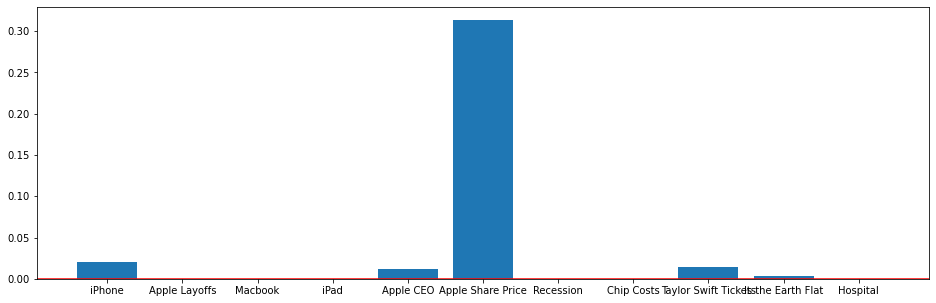

In [19]:
plt.figure(figsize = (16, 5))
plt.bar(range(len(coefficients)), coefficients, tick_label = X.columns)
plt.axhline(0., color = 'red')
plt.show()

# 5.) Do these coefficient magnitudes make sense?

For all the coefficients showed above, that of "Apple Share Price" is the most important, but coefficients of "iPhone", "Apple CEO", "Taylor Swift Ticket" and "Is the Earth Flat" are the least important. For other coefficients, they have nearly no relationship with nowcasting earning.

# 6.) Run a for loop looking at 10 different Lambdas and plot the coefficient magnitude for each.

# 7.) Run a cross validation. What is your ideal lambda?